In [77]:
import boto3
import pandas as pd
from io import StringIO

s3 = boto3.client('s3')
BUCKET_NAME = 'sagemaker-crawling-s3-bucket'
DIR_NAME = 'krx/' #저장된 폴더명

In [29]:
#저장된 csv파일 모두 가져오기(1000개 이상의 객체 제한을 고려한 코드)
def list_all_objects(bucket_name, prefix=''):
    s3 = boto3.client('s3')
    objects = []
    continuation_token = None

    while True:
        if continuation_token:
            response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix, ContinuationToken=continuation_token)
        else:
            response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)

        # 객체 추가
        objects.extend(response.get('Contents', []))

        # 다음 토큰 확인
        if response.get('NextContinuationToken'):
            continuation_token = response['NextContinuationToken']
        else:
            break

    return objects

all_objects = list_all_objects(BUCKET_NAME, prefix=DIR_NAME)
print(len(all_objects)) #전체 데이터 수

2781


In [165]:
#.csv 파일을 읽어와서 데이터프레임으로 변환/ dfs 딕셔너리에 파일명 저장
dfs = {}
for obj in all_objects:
    file_key = obj['Key']
    if file_key.endswith('.csv'):
        file_content = s3.get_object(Bucket=BUCKET_NAME, Key=file_key)['Body'].read().decode('utf-8')
        df = pd.read_csv(StringIO(file_content))
        file_name = file_key.split('/')[-1].split('.')[0]
        dfs[file_name] = df

In [166]:
print(list(dfs.keys())[0])

HK0000057197


In [167]:
dfs[list(dfs.keys())[0]]

,TRD_DD,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS,ISU_NM
0,2023/11/28,120,1,2,1.69,130,131,120,"22,582,385","2,827,614,840","35,031,846,000","291,932,050",이스트아시아홀딩스
1,2023/11/27,118,3,0,0.00,118,119,117,"3,220,959","391,740,172","34,447,981,900","291,932,050",이스트아시아홀딩스
2,2023/11/24,118,2,-1,-0.84,120,120,118,"1,756,771","207,874,027","34,447,981,900","291,932,050",이스트아시아홀딩스
3,2023/11/23,119,2,-1,-0.83,120,120,118,"1,628,722","194,059,901","34,739,913,950","291,932,050",이스트아시아홀딩스
4,2023/11/22,120,2,-1,-0.83,122,123,119,"3,073,359","369,985,034","35,031,846,000","291,932,050",이스트아시아홀딩스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,2010/04/29,"3,460",2,-240,-6.49,"3,700","3,740","3,430","1,170,700","4,157,244,845","79,580,000,000","23,000,000",이스트아시아홀딩스
3351,2010/04/28,"3,700",2,-50,-1.33,"3,700","3,970","3,660","1,422,838","5,420,720,915","85,100,000,000","23,000,000",이스트아시아홀딩스
3352,2010/04/27,"3,750",2,-110,-2.85,"3,885","3,930","3,745","1,385,013","5,268,663,780","86,250,000,000","23,000,000",이스트아시아홀딩스
3353,2010/04/26,"3,860",1,35,0.92,"3,655","4,055","3,650","4,312,630","16,652,290,815","88,780,000,000","23,000,000",이스트아시아홀딩스


In [168]:
list(dfs.keys())

['HK0000057197',
 'HK0000214814',
 'HK0000295359',
 'HK0000307485',
 'HK0000312568',
 'HK0000341732',
 'HK0000449303',
 'KR7000020008',
 'KR7000040006',
 'KR7000050005',
 'KR7000070003',
 'KR7000071001',
 'KR7000080002',
 'KR7000082008',
 'KR7000100008',
 'KR7000101006',
 'KR7000120006',
 'KR7000140004',
 'KR7000141002',
 'KR7000150003',
 'KR7000151001',
 'KR7000152009',
 'KR7000180000',
 'KR7000210005',
 'KR7000211003',
 'KR7000220004',
 'KR7000221002',
 'KR7000222000',
 'KR7000230003',
 'KR7000240002',
 'KR7000250001',
 'KR7000270009',
 'KR7000300004',
 'KR7000320002',
 'KR7000321000',
 'KR7000370007',
 'KR7000390005',
 'KR7000400002',
 'KR7000430009',
 'KR7000440008',
 'KR7000480004',
 'KR7000490003',
 'KR7000500009',
 'KR7000520007',
 'KR7000540005',
 'KR7000541003',
 'KR7000590000',
 'KR7000640003',
 'KR7000650002',
 'KR7000660001',
 'KR7000670000',
 'KR7000680009',
 'KR7000700005',
 'KR7000720003',
 'KR7000721001',
 'KR7000760009',
 'KR7000810002',
 'KR7000811000',
 'KR7000850008

In [171]:
length = len(list(dfs.keys()))
length

2780

In [132]:
for i in range(length):
    if list(dfs.keys())[i] == 'KR7035420009':
        print(i)

829


In [170]:
def hurst_exponent(time_series, max_lag):
    """
    Calculate the Hurst Exponent for a given time series.

    Parameters:
    - time_series: A pandas Series or similar array-like object representing a time series.
    - max_lag: The maximum lag (in terms of data points) to consider in the calculation.

    Returns:
    - H: The Hurst Exponent of the time series.
    """
    lags = range(2, max_lag)
    variances = [np.var(time_series.diff(lag)) for lag in lags]

    # Use log-log regression to estimate the Hurst Exponent
    log_vars = np.log(variances)
    log_lags = np.log(np.array(lags))
    poly = np.polyfit(log_lags, log_vars, 1)

    return poly[0] / 2

# Example usage:
# hurst_exponent(your_time_series)

In [180]:
import numpy as np

hurst_exponent_numpy = []

for i in range(length):
    h = dfs[list(dfs.keys())[i]]
    time_series = h['MKTCAP']
    time_series = time_series.str.replace(',', '').astype(float)
    
    try:
        max_lag = len(dfs[list(dfs.keys())[i]])*0.7 # 시간 구간을 정함. 여기서는 각 .csv 파일의 70%만 사용.
        max_lag = int(max_lag)
        hurst_exponent_result = hurst_exponent(time_series, max_lag)
        hurst_exponent_numpy.append([hurst_exponent_result,list(dfs.keys())[i]])
        print(hurst_exponent_result, list(dfs.keys())[i])
    except Exception as e:
        print(f"Error processing data for index {i}: {e}")

0.10200086327129579 HK0000057197
0.3870310197591362 HK0000214814
0.3584260337959623 HK0000295359
0.4006099168560847 HK0000307485
0.31263379271982394 HK0000312568
0.1633801245337435 HK0000341732
0.08274843609501588 HK0000449303
0.10008039248045943 KR7000020008
0.11769529962529428 KR7000040006
0.13710780643595732 KR7000050005
0.1149341833273442 KR7000070003
0.11506347268924572 KR7000071001
0.13523127617787128 KR7000080002
0.10809226038034747 KR7000082008
0.17724165672421427 KR7000100008
0.16731095378243502 KR7000101006
0.12406471079980061 KR7000120006
0.17284030768816339 KR7000140004
0.1294245106742961 KR7000141002
0.11667736357490394 KR7000150003
0.07403641617491728 KR7000151001
0.0766508683675906 KR7000152009
0.17398554286596798 KR7000180000
0.2046925648924698 KR7000210005
0.16194361452102474 KR7000211003
0.06223279057500593 KR7000220004
0.1687217576795287 KR7000221002
0.19497925573659824 KR7000222000
0.1386678570281642 KR7000230003
0.07486796130097292 KR7000240002
0.29588744966968583 

In [181]:
len(hurst_exponent_numpy)

2776

In [184]:
err = [2602, 2731, 2734, 2739]

In [186]:
hurst_exponent_csv = []
for i in range(length-4):
    if (abs(hurst_exponent_numpy[i][0]) <= 0.05) | (abs(hurst_exponent_numpy[i][0]) >= 0.95):
        hurst_exponent_csv.append(list(dfs.keys())[i])
        print(list(dfs.keys())[i])

KR7000300004
KR7000500009
KR7000910000
KR7001200005
KR7001250000
KR7001290006
KR7001440007
KR7001500008
KR7001620004
KR7001840008
KR7001940006
KR7002410009
KR7002780005
KR7002990000
KR7002991008
KR7004080008
KR7004720009
KR7005430004
KR7006380000
KR7009440009
KR7010060002
KR7010770006
KR7011150000
KR7011420007
KR7011810009
KR7013870001
KR7014190003
KR7014940001
KR7014990006
KR7015890007
KR7016100000
KR7016880007
KR7017900002
KR7023770001
KR7023790009
KR7024120008
KR7024840001
KR7025860008
KR7029480001
KR7030350003
KR7032560005
KR7032980005
KR7034230003
KR7036670008
KR7037370004
KR7037950003
KR7047560008
KR7048770002
KR7050960004
KR7052420007
KR7052960002
KR7053800009
KR7073560005
KR7084690007
KR7088390000
KR7092790005
KR7093510006
KR7098660004
KR7099410003
KR7100660000
KR7101400000
KR7104040001
KR7109740001
KR7118000009
KR7122690001
KR7131090003
KR7137080008
KR7139050009
KR7147830004
KR7149010001
KR7162120000
KR7169330008
KR7172670002
KR7185190006
KR7196450001
KR7220180004
KR7224760009

In [187]:
len(hurst_exponent_csv)

136

In [199]:
print(hurst_exponent_csv)

['KR7000300004', 'KR7000500009', 'KR7000910000', 'KR7001200005', 'KR7001250000', 'KR7001290006', 'KR7001440007', 'KR7001500008', 'KR7001620004', 'KR7001840008', 'KR7001940006', 'KR7002410009', 'KR7002780005', 'KR7002990000', 'KR7002991008', 'KR7004080008', 'KR7004720009', 'KR7005430004', 'KR7006380000', 'KR7009440009', 'KR7010060002', 'KR7010770006', 'KR7011150000', 'KR7011420007', 'KR7011810009', 'KR7013870001', 'KR7014190003', 'KR7014940001', 'KR7014990006', 'KR7015890007', 'KR7016100000', 'KR7016880007', 'KR7017900002', 'KR7023770001', 'KR7023790009', 'KR7024120008', 'KR7024840001', 'KR7025860008', 'KR7029480001', 'KR7030350003', 'KR7032560005', 'KR7032980005', 'KR7034230003', 'KR7036670008', 'KR7037370004', 'KR7037950003', 'KR7047560008', 'KR7048770002', 'KR7050960004', 'KR7052420007', 'KR7052960002', 'KR7053800009', 'KR7073560005', 'KR7084690007', 'KR7088390000', 'KR7092790005', 'KR7093510006', 'KR7098660004', 'KR7099410003', 'KR7100660000', 'KR7101400000', 'KR7104040001', 'KR7109

In [203]:
np.savetxt('hurst_exponent.txt',hurst_exponent_csv, fmt='%s')

In [200]:
dfs[hurst_exponent_csv[0]]

,TRD_DD,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS,ISU_NM
0,2023/11/28,275,2,-4,-1.43,281,310,269,"4,494,718","1,279,025,583","34,775,099,975","126,454,909",대유플러스
1,2023/11/27,279,2,-46,-14.15,325,325,276,"4,916,987","1,438,482,842","35,280,919,611","126,454,909",대유플러스
2,2023/11/24,325,2,-6,-1.81,336,339,323,"989,582","323,628,960","41,097,845,425","126,454,909",대유플러스
3,2023/11/23,331,2,-13,-3.78,350,350,330,"1,171,987","395,666,498","41,856,574,879","126,454,909",대유플러스
4,2023/11/22,344,2,-16,-4.44,378,378,341,"1,668,254","586,933,925","43,500,488,696","126,454,909",대유플러스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,1995/05/08,"4,600",2,-180,-3.77,"4,500","4,600","4,500","2,310","10,405,000","3,654,286,000","794,410",대유플러스
7221,1995/05/06,"4,780",5,-300,-5.91,"4,780","4,780","4,780",900,"4,302,000","3,797,279,800","794,410",대유플러스
7222,1995/05/04,"5,080",5,-320,-5.93,"5,080","5,080","5,080",410,"2,082,800","4,035,602,800","794,410",대유플러스
7223,1995/05/03,"5,400",3,0,0.00,"5,400","5,400","5,400",30,"162,000","4,289,814,000","794,410",대유플러스


In [188]:
hurst_values, stock_codes = zip(*hurst_exponent_numpy)

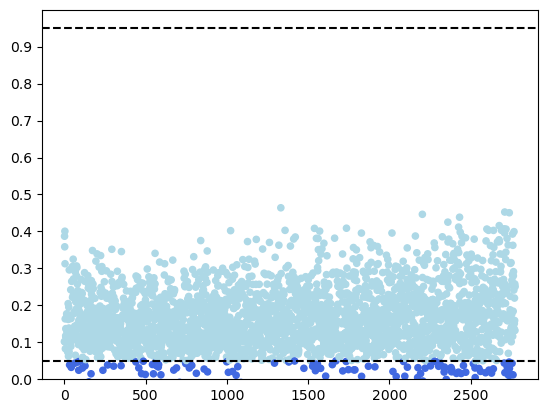

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# colors 설정
colors = ['RoyalBlue' if abs(y[0]) <= 0.05 else 'Pink' if abs(y[0]) >= 0.95 else 'LightBlue' for y in hurst_exponent_numpy]

# 그래프 생성
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.scatter(range(len(hurst_exponent_numpy)), [y[0] for y in hurst_exponent_numpy], marker='o', s=20, color=colors)
plt.axhline(y=0.05, color='black', linestyle='--')
plt.axhline(y=0.95, color='black', linestyle='--')
plt.show()

In [97]:
print(len(hurst_exponent_csv))

439


In [95]:
data = dfs['KR7005930003']
data['MKTCAP'] = data['MKTCAP'].str.replace(',', '').astype(float)
time_series = data['MKTCAP']

# 허스트 지수를 구할때 lag에 따른 결과 변화
for i in range(10,5000,100):
    hurst_exponent_result = hurst_exponent(time_series,i)
    print(f'i={i} H={hurst_exponent_result}')

i=10 H=0.45710631363270393
i=110 H=0.48088436119546607
i=210 H=0.490250510067543
i=310 H=0.4874160790483834
i=410 H=0.4804184081083561
i=510 H=0.4621918099736423
i=610 H=0.4332817537374978
i=710 H=0.39750746739408316
i=810 H=0.35799755973234176
i=910 H=0.32112756084658894
i=1010 H=0.29382963431582904
i=1110 H=0.2787821088476676
i=1210 H=0.2724986173966865
i=1310 H=0.27158531438936184
i=1410 H=0.272011637087076
i=1510 H=0.2724705224501309
i=1610 H=0.2727377266168146
i=1710 H=0.272106972243041
i=1810 H=0.2707358921565001
i=1910 H=0.26881469566453314
i=2010 H=0.2659460765905105
i=2110 H=0.2635021093644165
i=2210 H=0.26212176911525115
i=2310 H=0.26221358890747665
i=2410 H=0.2636794367441193
i=2510 H=0.2653142539684042
i=2610 H=0.26715167977508597
i=2710 H=0.2690224111503237
i=2810 H=0.2709918929476901
i=2910 H=0.2735004509292472
i=3010 H=0.27665125402436525
i=3110 H=0.2795883196074769
i=3210 H=0.28202893395288703
i=3310 H=0.28386540098622415
i=3410 H=0.2850018285533503
i=3510 H=0.285668527

In [75]:
#(Close, Open, High, Low, Marketcap, Volume)
cnt = 0
total =0
results = {}

def bt_data(data_bt):
    check_dtype = data_bt.dtype == 'object'
    if (check_dtype):
        return data_bt.str.replace(',','').astype('float')
    else :
        return data_bt.astype('float')
    
for i in range(1):
    dfdf = dfs[list(dfs.keys())[0]]
    columns_to_check = ['TRD_DD', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
                    'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL', 'LIST_SHRS','ISU_NM']

    if not all(col in dfdf.columns for col in columns_to_check):
        continue
    dfdf = dfdf[['TRD_DD', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
                    'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL', 'LIST_SHRS','ISU_NM']]
    for column in dfdf.columns:
        if dfdf[column].dtype == 'object' and column not in ['TRD_DD', 'ISU_NM']:
            try:
                dfdf[column] = dfdf[column].str.replace(',', '').astype('float')
            except ValueError as e:
                print(f" {column}: {e}")
        elif column not in ['TRD_DD', 'ISU_NM']:
            dfdf[column] = dfdf[column].astype('float')
    df =pd.concat([dfdf['TRD_DD'],dfdf['LIST_SHRS'],dfdf['ISU_NM'],dfdf['TDD_CLSPRC'],dfdf['TDD_OPNPRC'],dfdf['TDD_HGPRC'],dfdf['TDD_LWPRC'],dfdf['MKTCAP'],dfdf['ACC_TRDVOL']],axis=1)
    df = dfdf.sort_values(by=['TRD_DD'])
    df.reset_index(drop=True,inplace=True)

    #인풋 데이터 모양 맞춰주기(backtest에 들어갈 데이터 모양)
    df_bt = df[['TRD_DD', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
                    'TDD_LWPRC', 'MKTCAP', 'ACC_TRDVOL']].copy()
    df_bt['TRD_DD'] = pd.to_datetime(df_bt['TRD_DD'])
    df_bt.rename(columns={'TRD_DD':'Date', 'TDD_OPNPRC':'Open', 'TDD_HGPRC':'High','TDD_LWPRC':'Low','TDD_CLSPRC':'Close', 'ACC_TRDVOL':'Volume', 'MKTCAP':'Marketcap'}, inplace=True)
    df_bt.set_index('Date',drop=True,inplace=True)
    df_bt['Open'] = bt_data(df_bt['Open'])
    df_bt['High'] = bt_data(df_bt['High'])
    df_bt['Low'] = bt_data(df_bt['Low'])
    df_bt['Close'] = bt_data(df_bt['Close'])
    df_bt['Volume'] = bt_data(df_bt['Volume'])
    df_bt['Marketcap'] = bt_data(df_bt['Marketcap'])

/tmp/ipykernel_22840/2737621253.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf[column] = dfdf[column].str.replace(',', '').astype('float')


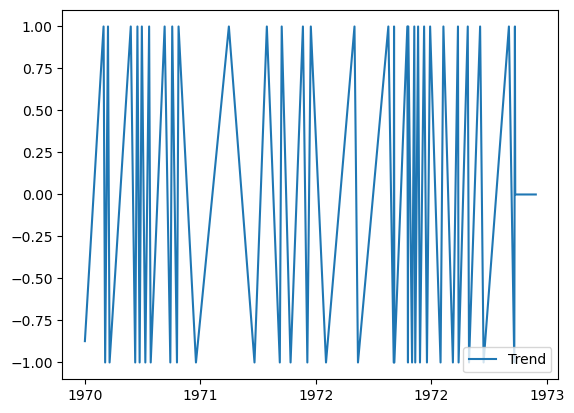

In [220]:
from matplotlib.dates import DateFormatter
# x 축 눈금 간격 조정
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

# 날짜 형식 변경
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.plot(pd.read_csv("result.csv")["Date"],pd.read_csv("result.csv")['Trend'],label = 'Trend')
plt.legend()
plt.show()

In [217]:
pd.read_csv("result.csv")["Date"]

0       2016-03-28
1       2016-03-29
2       2016-03-30
3       2016-03-31
4       2016-04-01
           ...    
1421    2022-01-05
1422    2022-01-06
1423    2022-01-07
1424    2022-01-10
1425    2022-01-11
Name: Date, Length: 1426, dtype: object

In [215]:
pd.read_csv("result.csv")["Date"]

0       2016-03-28
1       2016-03-29
2       2016-03-30
3       2016-03-31
4       2016-04-01
           ...    
1421    2022-01-05
1422    2022-01-06
1423    2022-01-07
1424    2022-01-10
1425    2022-01-11
Name: Date, Length: 1426, dtype: object

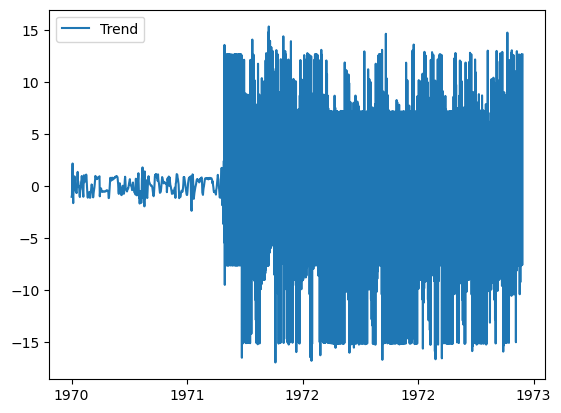

In [221]:
from matplotlib.dates import DateFormatter
# x 축 눈금 간격 조정
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

# 날짜 형식 변경
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.plot(pd.read_csv("result.csv")["Date"],pd.read_csv("result.csv")['pred_Trend'],label = 'Trend')
plt.legend()
plt.show()

In [222]:
pd.read_csv("result.csv")

,Unnamed: 0,pred_Trend,Date,Marketcap,Trend,portfolio,sell_buy,buy_and_hold
0,0,-1.021823,2016-03-28,2.033797e+13,-0.873016,1.000000e+06,1,1.000000e+06
1,1,-0.866249,2016-03-29,2.109611e+13,-0.841270,1.022366e+06,0,1.037277e+06
2,2,0.528971,2016-03-30,2.099723e+13,-0.809524,1.019449e+06,-1,1.032415e+06
3,3,2.174911,2016-03-31,2.099723e+13,-0.777778,1.019449e+06,0,1.032415e+06
4,4,-0.866210,2016-04-01,2.070056e+13,-0.746032,1.019449e+06,1,1.017828e+06
...,...,...,...,...,...,...,...,...
1421,1421,12.636087,2022-01-05,5.823743e+13,0.000000,2.417222e+06,-1,2.863482e+06
1422,1422,-7.600556,2022-01-06,5.553062e+13,0.000000,2.417222e+06,1,2.730391e+06
1423,1423,12.645076,2022-01-07,5.544859e+13,0.000000,2.415079e+06,-1,2.726358e+06
1424,1424,-7.573018,2022-01-10,5.495644e+13,0.000000,2.415079e+06,1,2.702159e+06
